In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/BitcoinPredection.csv')
df.head()

,Open Time,Open,High,Low,Close,Volume
0,2021-06-26,31576.09,32730.00,30151.00,32283.65,107820.375287
1,2021-06-27,32283.65,34749.00,31973.45,34700.34,96613.244211
2,2021-06-28,34702.49,35297.71,33862.72,34494.89,82222.267819
3,2021-06-29,34494.89,36600.00,34225.43,35911.73,90788.796220
4,2021-06-30,35911.72,36100.00,34017.55,35045.00,77152.197634


In [3]:
df['Open Time'] = pd.to_datetime(df['Open Time'])

# Sort by date
df = df.sort_values('Open Time')

# Create target variable: next day's Close
df['Target'] = df['Close'].shift(-1)

# Drop last row (NaN target)
df = df.dropna()

# Select features for linear regression
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Target']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 1662.65
RMSE: 2289.30
R²: 0.9766


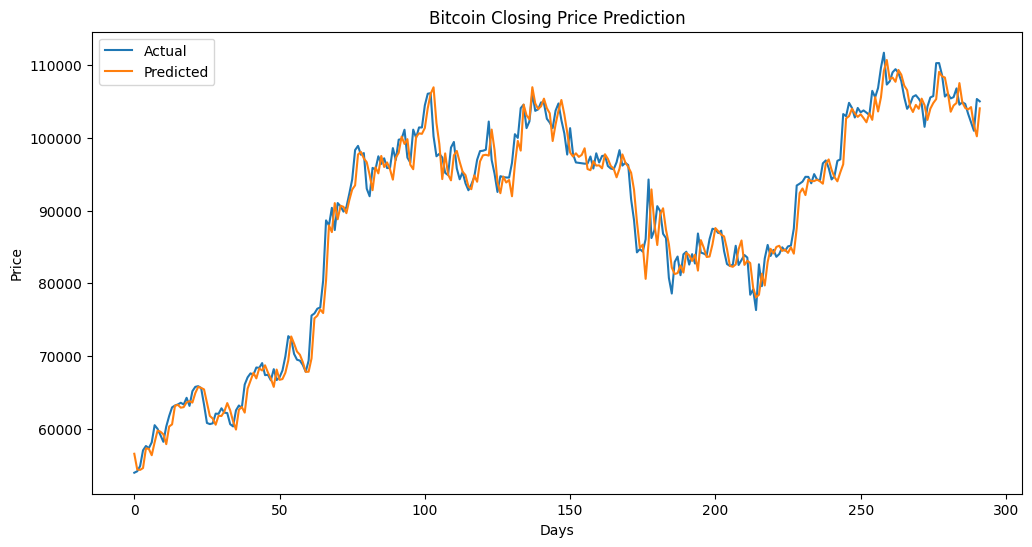

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Bitcoin Closing Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()